In [2]:
# Google Colab: Upload local files
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

# Upload dataset from local machine
uploaded = files.upload()


from warnings import filterwarnings
from sklearn import linear_model

Saving training.csv to training (1).csv


In [ ]:
training_data = pd.read_csv("training.csv")
training_data.head()

,date,home_team,away_team,home_score,away_score,home_team_victory,draw,tournament_name,city,country,neutral,scoring_team,scoring_player,minute,own_goal,penalty,shootout_required,first_shooter,winner
0,1933-06-11,Sweden,Estonia,6,2,True,False,FIFA World Cup qualification,Stockholm,Sweden,False,Sweden,Knut Kroon,7.0,False,False,False,NaN,NaN
1,1933-06-11,Sweden,Estonia,6,2,True,False,FIFA World Cup qualification,Stockholm,Sweden,False,Sweden,Lennart Bunke,10.0,False,False,False,NaN,NaN
2,1933-06-11,Sweden,Estonia,6,2,True,False,FIFA World Cup qualification,Stockholm,Sweden,False,Sweden,Bertil Ericsson,13.0,False,False,False,NaN,NaN
3,1933-06-11,Sweden,Estonia,6,2,True,False,FIFA World Cup qualification,Stockholm,Sweden,False,Sweden,Torsten Bunke,43.0,False,False,False,NaN,NaN
4,1933-06-11,Sweden,Estonia,6,2,True,False,FIFA World Cup qualification,Stockholm,Sweden,False,Estonia,Leonhard Kass,47.0,False,False,False,NaN,NaN


Saving training.csv to training (3).csv
  date,home_team,away_team,home_score,away_score,home_team_victory,draw,tournament_name,city,country,neutral,scoring_team,scoring_player,minute,own_goal,penalty,shootout_required,first_shooter,winner
0  1933-06-11,Sweden,Estonia,6,2,True,False,FIFA ...                                                                                                                                                   
1  1933-06-11,Sweden,Estonia,6,2,True,False,FIFA ...                                                                                                                                                   
2  1933-06-11,Sweden,Estonia,6,2,True,False,FIFA ...                                                                                                                                                   
3  1933-06-11,Sweden,Estonia,6,2,True,False,FIFA ...                                                                                                            

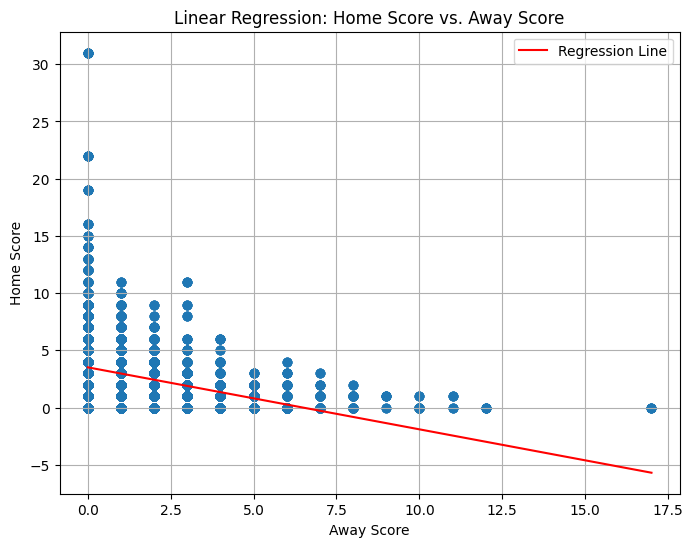

In [5]:
# Google Colab: Upload local files
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

# Upload dataset from local machine
uploaded = files.upload()

# Immediately load the data into training_data after uploading
training_data = pd.read_csv("training.csv")
training_data.head()

from warnings import filterwarnings
from sklearn import linear_model

# prompt: Using dataframe training_data: linear regression

import statsmodels.formula.api as sm

# Define the linear regression model
# The model predicts 'home_score' based on 'away_score'
model = sm.ols('home_score ~ away_score', data=training_data)

# Fit the model to the data
results = model.fit()

# Read dataset (modify filename as needed)
filename = list(uploaded.keys())[0]  # Auto-detect uploaded file
# Check if the file is tab-separated or comma-separated
try:
  df = pd.read_csv(filename, delimiter='\t')  # Try tab delimiter first
except pd.errors.ParserError:
  df = pd.read_csv(filename)  # If tab fails, try comma delimiter

# Or, explicitly specify the delimiter if you know it
# df = pd.read_csv(filename, delimiter='\t')  # For tab-separated values
# df = pd.read_csv(filename, delimiter=',')  # For comma-separated values

# Display first few rows to confirm data was loaded correctly
print(df.head())  # Print the head to inspect column names
print(df.columns) # Print the column names

# Check for and handle missing or infinite values
# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with any missing values
df.dropna(inplace=True)

# Print the regression results
print(results.summary())

# --- Plotting the regression line ---
# Create a scatter plot of the data
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(training_data['away_score'], training_data['home_score'], alpha=0.5)  # alpha for transparency

# Get the regression line parameters
intercept = results.params['Intercept']
slope = results.params['away_score']

# Create x values for the regression line
x_values = np.linspace(training_data['away_score'].min(), training_data['away_score'].max(), 100)

# Calculate y values for the regression line
y_values = intercept + slope * x_values

# Plot the regression line
plt.plot(x_values, y_values, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Away Score')
plt.ylabel('Home Score')
plt.title('Linear Regression: Home Score vs. Away Score')
plt.legend()  # Show the legend
plt.grid(True)  # Add a grid for better visualization
plt.show()